# Loading Toolkit

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets, preprocessing
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE

from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 12))

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

# Loading Data Set

In [2]:
cardio_train_df=pd.read_csv('cardio_train.csv')
cardio_train_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
cardio_train_df.keys()

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [4]:
print(cardio_train_df.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


# For verify empty datas in the dataset

In [5]:
cardio_train_df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
cardio_train_df.isna().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

<AxesSubplot:>

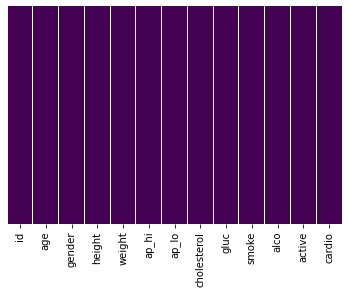

In [7]:
sns.heatmap(data=cardio_train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

###### observation: There isnt any empty data

# Meeting with the data set

In [8]:
cardio_train_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
cardio_train_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
cardio_train_df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [11]:
# dataframe.size 
cardio_train_df.size 

910000

In [12]:
cardio_train_df.shape 

(70000, 13)

##### Observation: There are 13 columns and 70000 rows and 91000 datas

### Focus on the Problem

In [13]:
cardio_train_df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<AxesSubplot:xlabel='cardio', ylabel='count'>

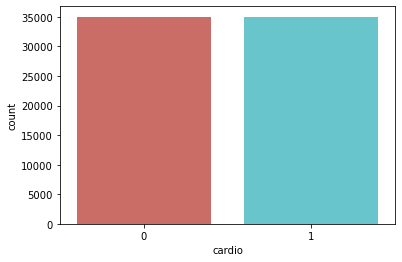

In [14]:
sns.countplot(x='cardio', data=cardio_train_df, palette='hls')

##### Observation: Approximately half of the data have been diagnosed with the Cardiovascular so our dataset is balanced 

In [15]:
cardio_train_df.groupby('cardio').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,,
0,49862.869107,18881.623711,1.345707,164.448017,71.592150,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881
1,50082.102233,20056.813031,1.353441,164.270334,76.822368,137.212042,109.023929,1.517396,1.277595,0.083736,0.052117,0.789559


In [16]:
cardio_train_df.groupby('gender').mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,,
1,49898.345267,19510.124577,161.355612,72.565605,128.139249,94.522776,1.384735,1.235054,0.017856,0.025500,0.802021,0.496727
2,50110.246547,19392.097875,169.947895,77.257307,130.078872,100.551982,1.333633,1.210462,0.218880,0.106375,0.806906,0.505231


##### Observation : According to the data set, the risk ratio of men is higher than that of women

In [17]:
cardio_train_df.groupby('cholesterol').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,cardio
cholesterol,,,,,,,,,,,,
1,49883.917381,19283.308084,1.359168,164.590283,73.053862,126.608705,93.733741,1.099093,0.085196,0.048067,0.802367,0.440107
2,50064.959682,19604.875799,1.329459,163.880406,76.666464,134.788250,105.838098,1.335218,0.105666,0.076134,0.799037,0.602157
3,50437.649516,20512.962311,1.311059,163.425490,78.773085,136.092239,104.542400,1.924870,0.086412,0.064344,0.818125,0.765435


##### Observation : According to the data set, the risk ratio of higher cholesterol ratio is higher than normal cholesterol ratio

In [18]:
cardio_train_df.groupby('gluc').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco,active,cardio
gluc,,,,,,,,,,,,
1,49937.910960,19377.449032,1.353200,164.426218,73.476684,127.982633,95.540729,1.250256,0.087880,0.051817,0.805242,0.480590
2,50214.070906,19684.581696,1.341811,164.002119,79.041850,133.872832,105.887669,1.668786,0.104239,0.078998,0.789788,0.593064
3,50122.183268,20278.810167,1.316639,163.959482,77.631101,133.207841,99.775839,2.374039,0.075220,0.051022,0.800413,0.622022


##### Observation : According to the data set, the risk ratio of higher glukoz ratio is higher than normal glukoz ratio

In [19]:
cardio_train_df.groupby('smoke').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,alco,active,cardio
smoke,,,,,,,,,,,,
0,50005.59844,19505.400730,1.299447,163.879416,73.902352,128.861431,96.326550,1.364682,1.227303,0.029923,0.800536,0.502107
1,49629.11963,19090.836927,1.868212,169.323877,77.344351,128.360512,99.774518,1.389528,1.217701,0.300535,0.836764,0.474793


##### Observation : According to the data set, very surprisingly, the risk ratio of smoking is lover than notsmoking 

In [20]:
cardio_train_df.groupby('alco').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active,cardio
alco,,,,,,,,,,,,
0,49964.098315,19486.347319,1.330138,164.174437,73.975379,128.765581,96.154116,1.361073,1.224923,0.065146,0.801317,0.500574
1,50118.856801,19161.239639,1.691552,167.611052,78.258528,129.727152,105.011955,1.468916,1.253454,0.492561,0.846174,0.484325


##### Observation : According to the data set, very surprisingly, the risk ratio of drinking alcohol is lover than not drinking alcohol

In [21]:
cardio_train_df.groupby('active').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio
active,,,,,,,,,,,,
0,49753.183929,19518.430235,1.343911,164.468375,74.697038,128.827571,94.807264,1.353228,1.234297,0.073295,0.042143,0.535774
1,50025.957573,19456.762127,1.350954,164.332575,74.085702,128.814774,97.075630,1.370203,1.224543,0.091751,0.056611,0.490891


##### Observation : According to the data set, the risk ratio of doing spor is lover than not doing spor

<AxesSubplot:xlabel='age'>

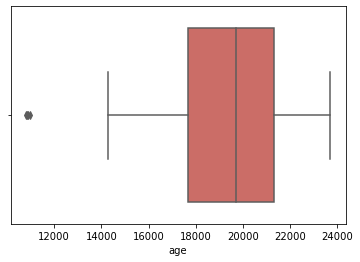

In [22]:
import seaborn as sb
sb.boxplot(x='age', data=cardio_train_df, palette='hls')

<AxesSubplot:>

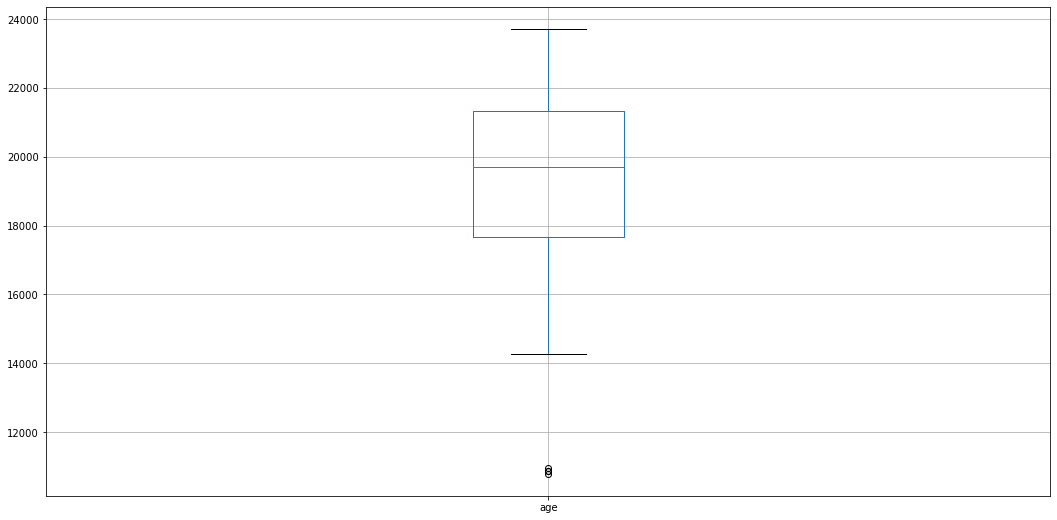

In [23]:
cardio_train_df.boxplot(column=["age"],figsize=(18,9))

In [24]:
20000/365

54.794520547945204

In [25]:
cardio_train_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


##### A boxplot is a standardized way of displaying the dataset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.
* min age =10798
* first quartiles=17664.00000
* 19000<the sample median < 20000
* mean=19468
* third quartiles=19703

<AxesSubplot:>

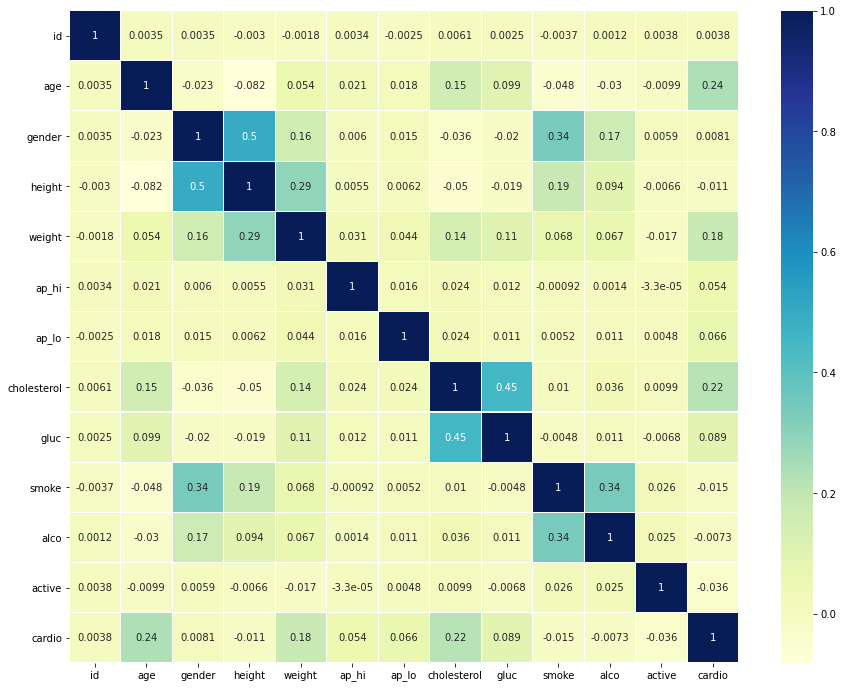

In [26]:
matrice_corr = cardio_train_df.corr()
f, ax = plt.subplots(figsize =(15, 12)) 
sns.heatmap(matrice_corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True) 

#### Defyning X and y

In [27]:
X = cardio_train_df.drop(['cardio', 'id'], axis=1)
y = cardio_train_df['cardio']
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


<AxesSubplot:title={'center':'Correlation with Cardio'}>

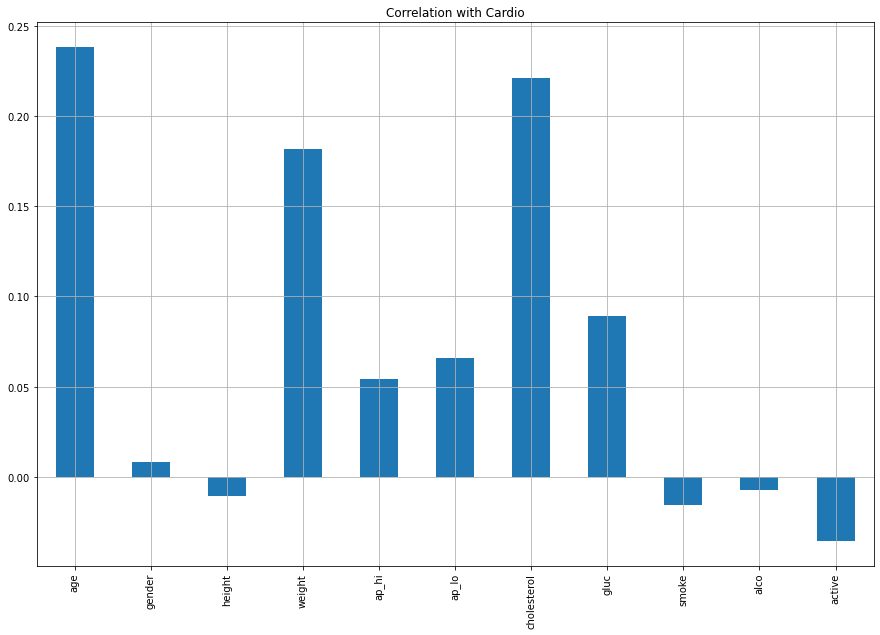

In [28]:
X.corrwith(cardio_train_df.cardio).plot.bar(figsize = (15, 10), title = "Correlation with Cardio", fontsize = 10,grid = True)

In [29]:
# sns.set(style = 'ticks', color_codes=True)
# sns.pairplot(data=cardio_train_df, hue='cardio',  
#              vars=['age','weight','cholesterol'])

##### observation: weight, cholesterol, age ; These have very strong relation with cardiovascular

##### Splitting the dataset into the traing set and test set

In [30]:
#Splitting the dataset into the traing set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=0)

#### Feature scaling with standard scaler

In [31]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

##### Define the Random Forest model, train the model and make prediction on test data

In [32]:
# Define the Random Forest model, train the model and make prediction on test data
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

##### Predicting Test set For Random Forest model

In [33]:
y_pred_rf = rf_classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test,y_pred_rf)
results = pd.DataFrame([['Random Forest model', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest model,0.704214,0.723781,0.659949,0.690393


#### Applying K-folds validation to Random Forest Model

In [34]:
# Applying K-folds validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= rf_classifier, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('KNN Model (Lasso) Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

KNN Model (Lasso) Accuracy: 0.700 (+/- 0.013)


##### EXTRA: Confusion Matrix for Random Forest model

Test Data Accuracy: 0.7042


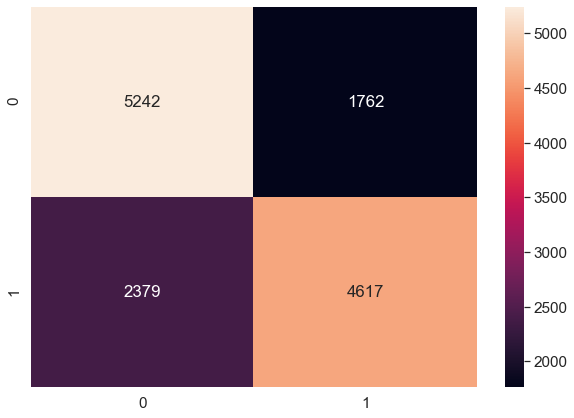

In [35]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred_rf)) 

# KNN Model

##### Define the KNN model, train the model and make prediction on test data

In [36]:
#Define the KNN model, train the model and make prediction on test data
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

##### Predicting Test set For KNN model

In [37]:
##### Predicting Test set For KNN model
y_pred_knn = knn_classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test,y_pred_knn)
results = pd.DataFrame([['KNN model', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN model,0.651286,0.658044,0.629074,0.643233


#### Applying K-folds validation to KNN Model

In [38]:
#Applying K-folds validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= knn_classifier, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('KNN Model (Lasso) Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

KNN Model (Lasso) Accuracy: 0.648 (+/- 0.010)


#### EXTRA: Confusion Matrix for KNN model

Test Data Accuracy: 0.6513


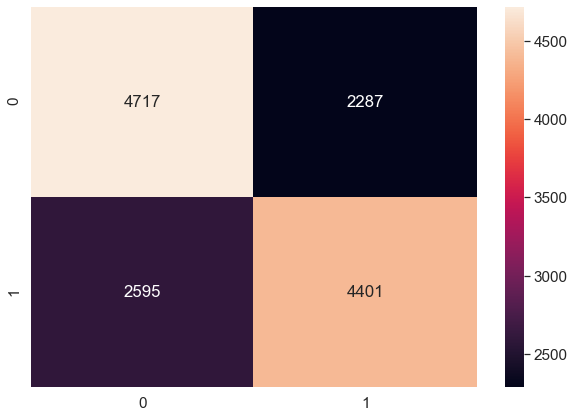

In [39]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred_knn)) 

# Gaussian Naive Bayes

##### Define the Naive Bayes model, train the model and make prediction on test data

In [40]:
#Define the Naive Bayes model, train the model and make prediction on test data
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

##### Predicting Test set For Naive Bayes

In [41]:
y_pred_nb = nb_classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred_nb)
prec = precision_score(y_test, y_pred_nb)
rec = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test,y_pred_nb)
results = pd.DataFrame([['Naive Bayes', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.595571,0.721595,0.310463,0.43414


#### Applying K-folds validation to Gaussian Naive Bayes

In [42]:
#Applying K-folds validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= nb_classifier, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('Gaussian Naive Bayes (Lasso) Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

Gaussian Naive Bayes (Lasso) Accuracy: 0.594 (+/- 0.013)


##### EXTRA: Confusion Matrix for Naive Bayes

Test Data Accuracy: 0.5956


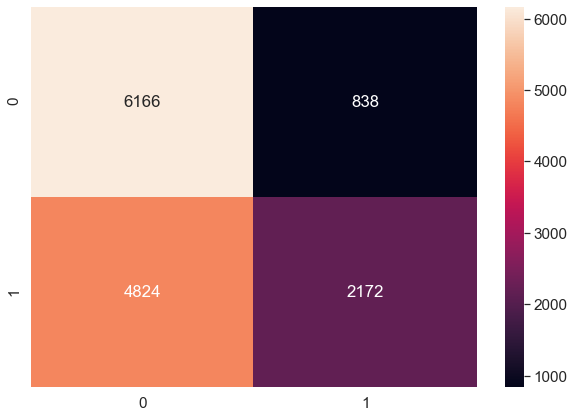

In [43]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred_nb)) 

# Logistic Regression

#### Define the Logistic Regression model, train the model and make prediction on test data

In [44]:
#Define the Logistic Regression model, train the model and make prediction on test data
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(solver='liblinear',random_state=0, penalty='l1')
lr_classifier.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

##### Predicting Test set For Logistic Regression

In [45]:
#Predicting Test set
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
y_pred_lr = lr_classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test,y_pred_lr)
results = pd.DataFrame([['Logistic Regression (Lasso)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.724929,0.746977,0.679817,0.711816


#### Applying K-folds validation

In [46]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= lr_classifier, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('Logistic Regression (Lasso) Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression (Lasso) Accuracy: 0.719 (+/- 0.013)


##### EXTRA: Confusion Matrix for Logistic Regression

Test Data Accuracy: 0.7249


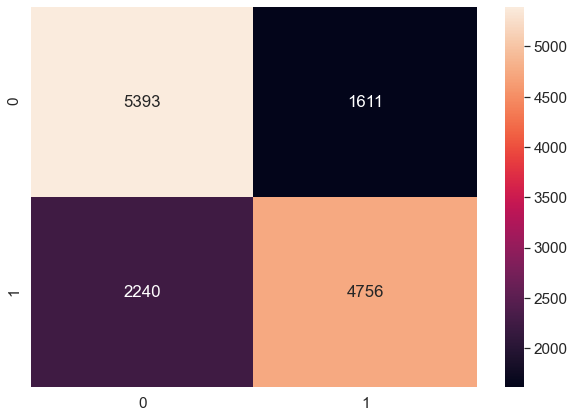

In [47]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred_lr)) 

Confusion matrix for Logistic Regression
[[5393 1611]
 [2240 4756]]
Normalized confusion matrix for Logistic Regression
[[0.76998858 0.23001142]
 [0.32018296 0.67981704]]


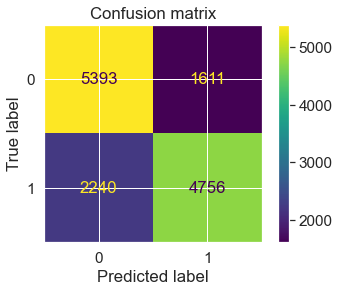

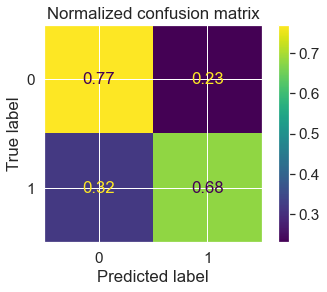

In [48]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr_classifier, X_test, y_test, normalize=normalize)
    disp.ax_.set_title(title)
    print(title,'for Logistic Regression')
    print(disp.confusion_matrix)
plt.show()

##### Visualize the ROC Curve Analysis including all 4 classification models

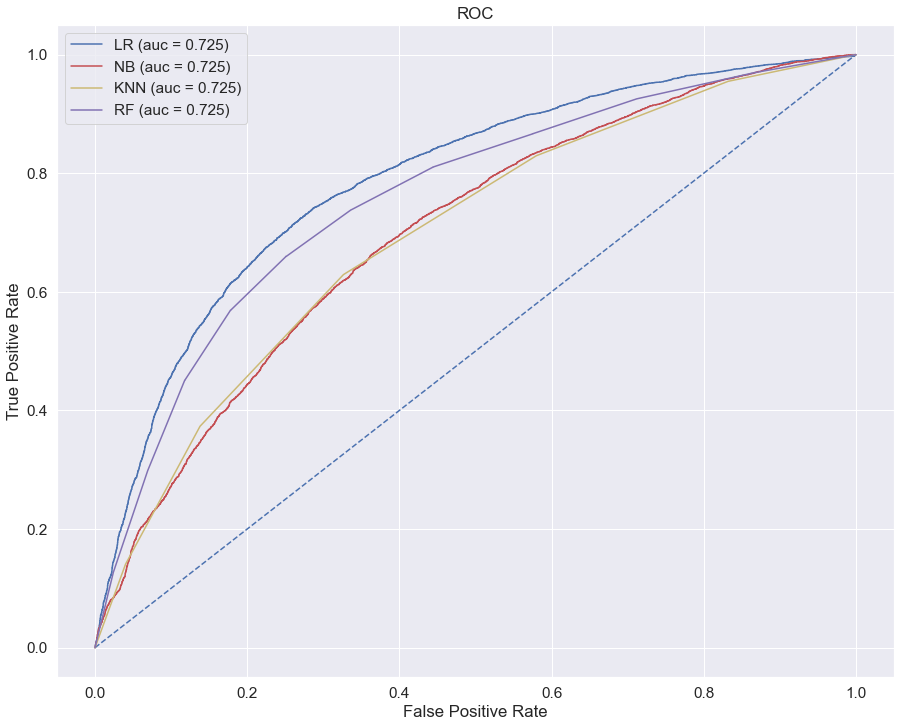

In [49]:
plt.figure(figsize=(15,12))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, lr_classifier.predict(X_test))
fpr1, tpr1, thresholds = roc_curve(y_test, lr_classifier.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:,1])
fpr3, tpr3, thresholds = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:,1])
fpr4, tpr4, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
plt.plot([0, 1], [0, 1],'b--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr1, tpr1, label='LR (auc = %0.3f)' % roc_auc, color='b')
plt.plot(fpr2, tpr2, label='NB (auc = %0.3f)' % roc_auc, color='r')
plt.plot(fpr3, tpr3, label='KNN (auc = %0.3f)' % roc_auc, color='y')
plt.plot(fpr4, tpr4, label='RF (auc = %0.3f)' % roc_auc, color='m')
plt.legend()
plt.show()

##### Visualize the CAP Curve Analysis including all 4 classification models

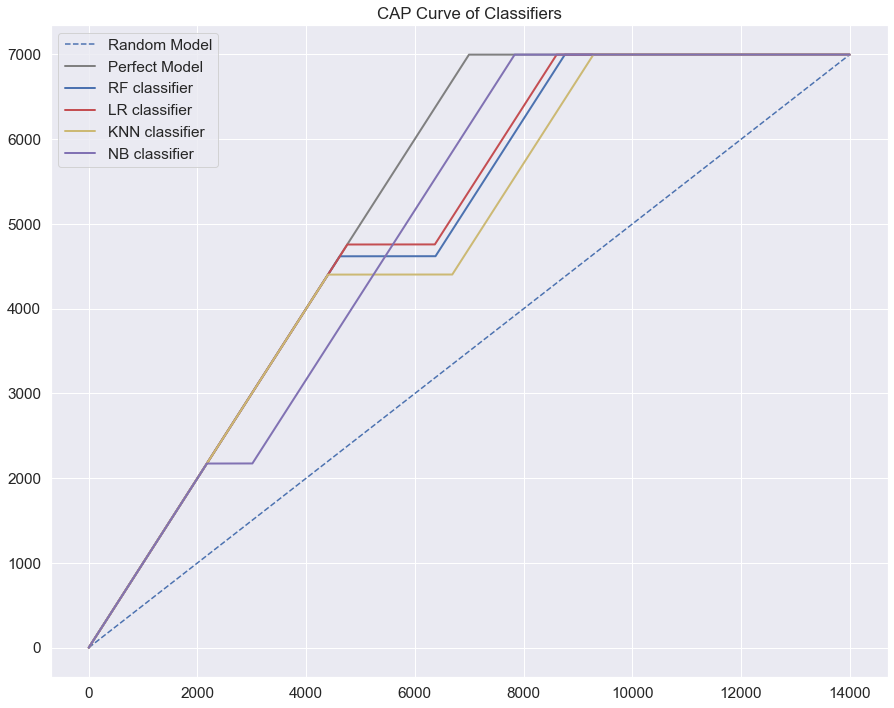

In [50]:
#Visualize the CAP Curve Analysis including all 4 classification models
total = len(y_test) 
one_count = np.sum(y_test) 
zero_count = total - one_count 
lm_rf = [y for _, y in sorted(zip(y_pred_rf, y_test), reverse = True)]
lm_lr = [y for _, y in sorted(zip(y_pred_lr, y_test), reverse = True)] 
lm_knn = [y for _, y in sorted(zip(y_pred_knn, y_test), reverse = True)] 
lm_nb = [y for _, y in sorted(zip(y_pred_nb, y_test), reverse = True)] 
x = np.arange(0, total + 1) 
y_rf = np.append([0], np.cumsum(lm_rf)) 
y_lr = np.append([0], np.cumsum(lm_lr)) 
y_knn = np.append([0], np.cumsum(lm_knn)) 
y_nb = np.append([0], np.cumsum(lm_nb)) 
plt.figure(figsize = (15, 12)) 
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'grey', linewidth = 2, label = 'Perfect Model')
plt.title('CAP Curve of Classifiers')
plt.plot(x, y_rf, c = 'b', label = 'RF classifier', linewidth = 2)
plt.plot(x, y_lr, c = 'r', label = 'LR classifier', linewidth = 2)
plt.plot(x, y_knn, c = 'y', label = 'KNN classifier', linewidth = 2)
plt.plot(x, y_nb, c = 'm', label = 'NB classifier', linewidth = 2)
plt.legend()

In [51]:
#Plotting Cumulative Accuracy Profile (CAP)
y_pred_prob = lr_classifier.predict_proba(X_test)
from scipy import integrate
def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
#     print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    percent = 0.5
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    fig.set_figheight(12)
    fig.set_figwidth(15)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    plt.xlim(0, 1.25)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()

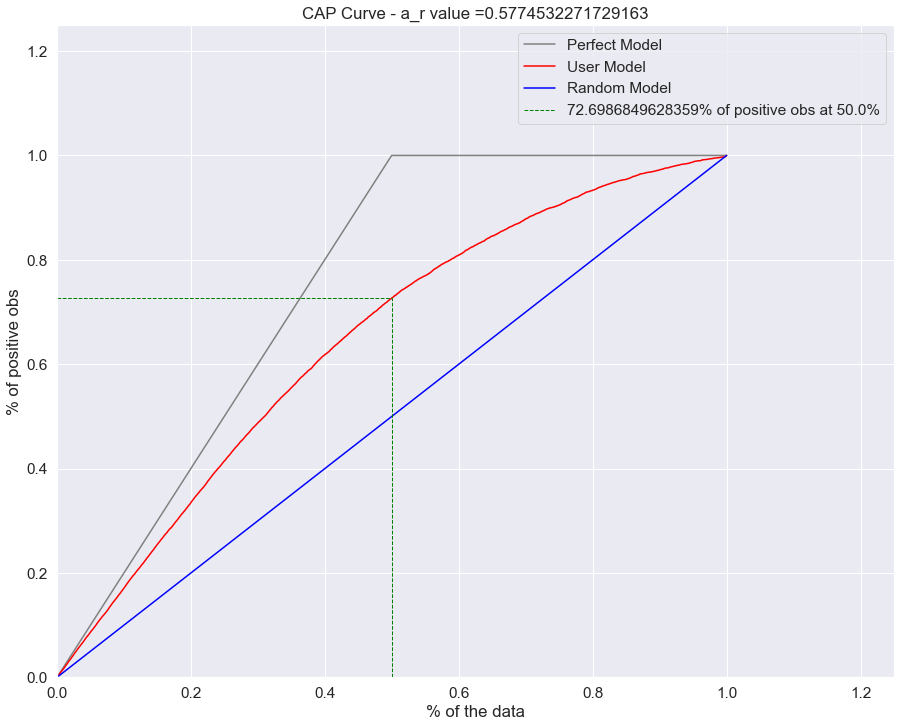

In [52]:
capcurve(y_test,y_pred_prob[:,1])

In [53]:
#Analyzing the coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(lr_classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,0.367516
1,gender,0.011475
2,height,-0.045235
3,weight,0.220914
4,ap_hi,5.609932
5,ap_lo,0.057337
6,cholesterol,0.357902
7,gluc,-0.071125
8,smoke,-0.033721
9,alco,-0.032525


In [54]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(lr_classifier, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[ True False False  True  True False  True False False False  True]
[1 7 4 1 1 3 1 2 6 5 1]


Index(['age', 'weight', 'ap_hi', 'cholesterol', 'active'], dtype='object')

#### New Correlation Matrix

<AxesSubplot:>

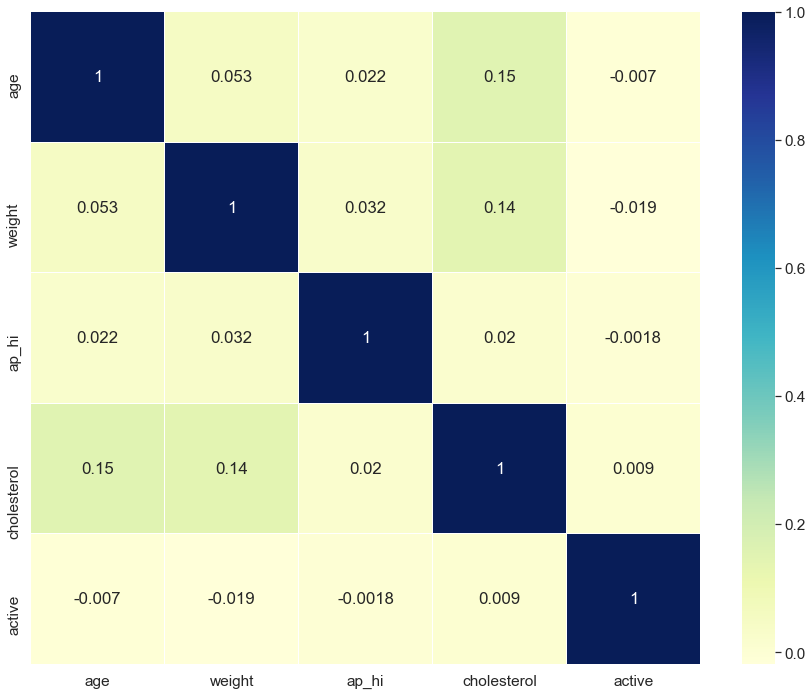

In [55]:
#### New Correlation Matrix

matrice_corr = X_train[X_train.columns[rfe.support_]].corr()
f, ax = plt.subplots(figsize =(15, 12)) 
sns.heatmap(matrice_corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True) 

In [56]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(solver='liblinear',random_state=0, penalty= 'l1')
classifier1.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier1.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.724929,0.746977,0.679817,0.711816
1,Logistic Regression RFE (Lasso),0.722714,0.744811,0.677101,0.709344


Confusion matrix for Logistic Regression
[[5381 1623]
 [2259 4737]]
Normalized confusion matrix for Logistic Regression
[[0.76827527 0.23172473]
 [0.3228988  0.6771012 ]]


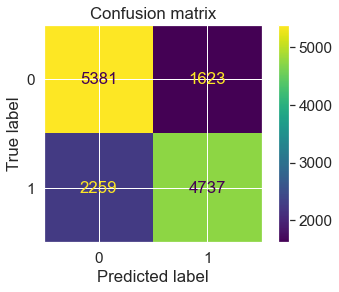

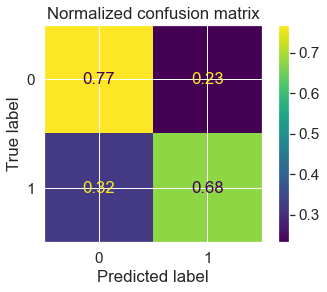

In [57]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier1, X_test[X_train.columns[rfe.support_]], y_test, normalize=normalize)
    disp.ax_.set_title(title)
    print(title,'for Logistic Regression')
    print(disp.confusion_matrix)
plt.show()

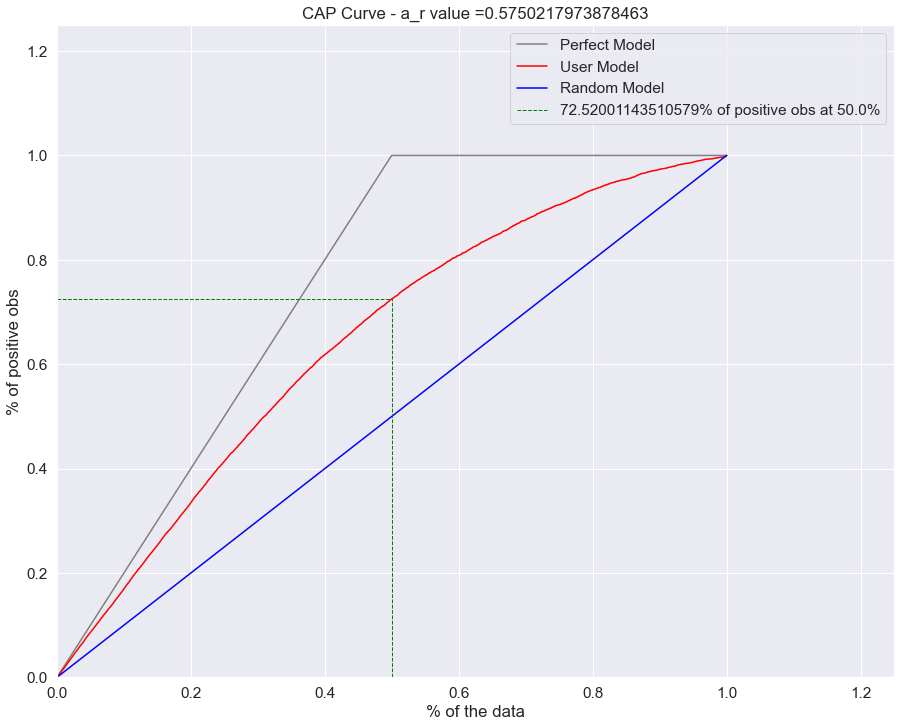

In [58]:
y_pred_prob = classifier1.predict_proba(X_test[X_train.columns[rfe.support_]])
capcurve(y_test,y_pred_prob[:,1])

# My Logistic Regression Class 

x_train:  (11, 56000)
x_test:  (11, 14000)
y_train:  (56000,)
y_test:  (14000,)


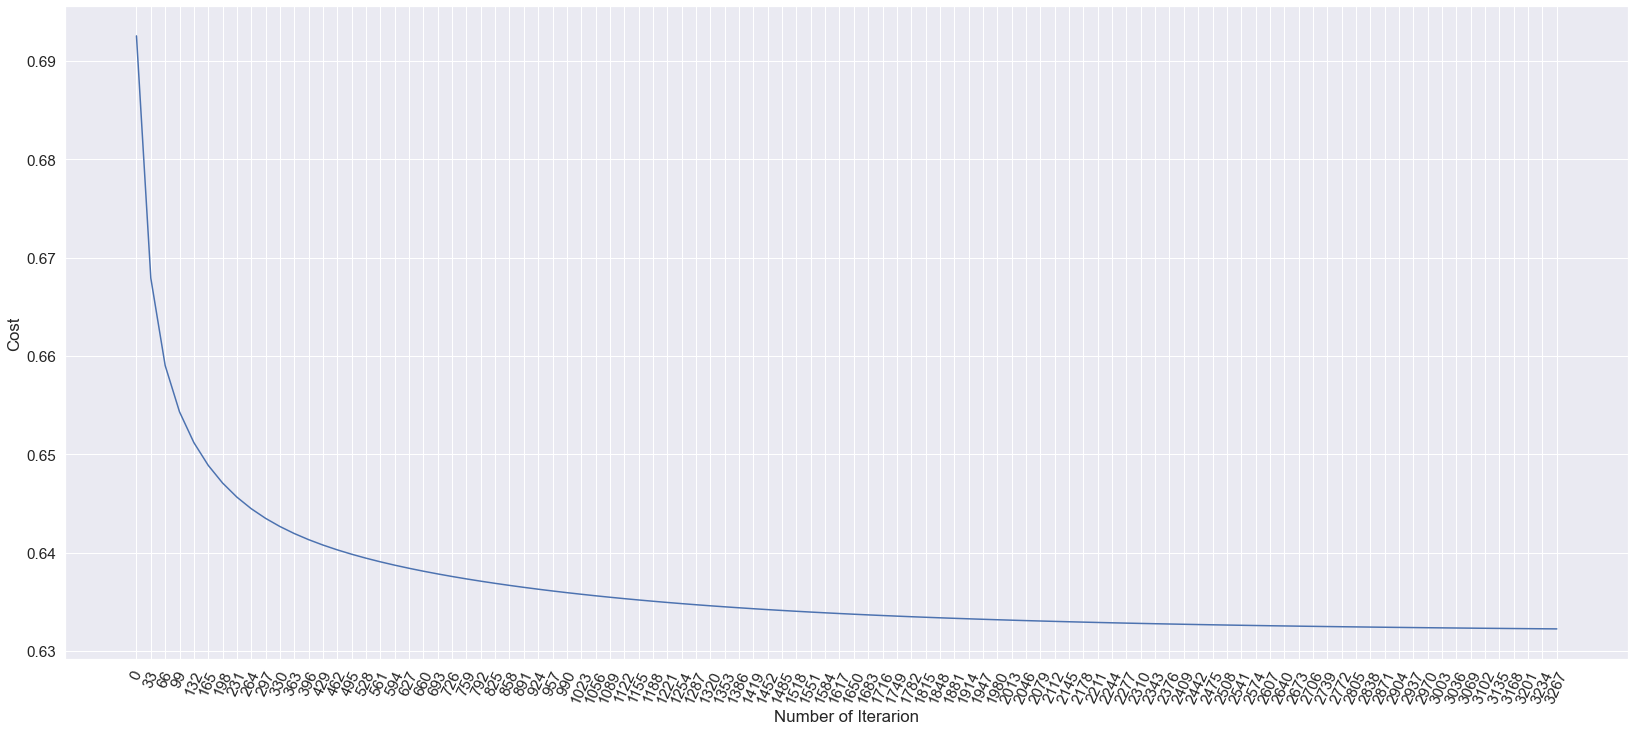

test accuracy: 65.0142857142857 %


In [59]:
# %% libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
figure(num=None, figsize=(28, 12))

# %% read csv
#verinin içinden unnamed alanını kaldırıyoruz çünkü null alanlar modelde olmamalı.
data=pd.read_csv('cardio_train.csv')
data.drop(["id"],axis=1)

y = data.cardio.values
x_data = data.drop(["id","cardio"],axis=1)


# %% normalization
#bütün değerleri 0 ve 1 arasında bir değere dönüştürür.
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values



# %% train test split
from sklearn.model_selection import train_test_split
#%20'si test %80 train olarak ayırdık.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

# %% parameter initialize and sigmoid function
# dimension = 11
# 11 tane future var. Ağırlıkları 0.011 olarak verdik.
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.011)
    b = 0.0
    return w,b


# w,b = initialize_weights_and_bias(11)
#sigmoid function yazılır 
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head
# print(sigmoid(0))


def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

#%% Updating(learning) parameters
#update için weight,bias,x_train,y_train,learning weight gerek.
#learning weight kullanarak ne kadar hızlı öğreneceğini belirliyoruz.
#number_of_iterarion : kaç kez işlemin tekrarlanacağını belirleriz.


def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 33 == 0:
            cost_list2.append(cost)
            index.append(i)
#             print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation=66)
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

#%%  # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# %% logistic_regression
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 11
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.66 , num_iterations = 3300)    

In [60]:
def predictedCardio():
    age=int(input("Quel âge avez-vous (si possible en jours) ? :"))
    if age<150:
        age=age*365
    gender=int(input("Quel est ton sexe (1 pour femme 2 pour homme) ? : "))
    height=int(input("Quelle est votre taille ? : "))
    weight=float(input("Combien de kg pesez-vous ? : "))
    ap_hi=int(input("Tension artérielle systolique (veuillez compléter)? : "))
    ap_lo=int(input("Tension artérielle diastolique (veuillez compléter) ? : "))
    cholesterol=int(input('Quel est votre taux de cholestérol (1: normal, 2: supérieur à la normale, 3: beaucoup plus élevé que la normale)? :' ))
    gluc=int(input("Quel est votre taux de glucose (1: normal, 2: supérieur à la normale, 3: beaucoup plus élevé que la normale)? : "))
    smoke=int(input("Fumez-vous (0: non, 1: oui)? : "))
    alco=int(input("Êtes-vous alcoolique (0: non, 1: oui)? : "))
    active=int(input("Faites-vous du sport (0: non, 1: oui)? : "))
    predictedCardio = lr_classifier.predict([[age, gender, height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active]])
    if predictedCardio==1:
        print("Oui, vous avez un risque de maladie cardiovasculaire")
    else:
        print("Non, vous n'avez aucun risque de maladie cardiovasculaire")
    print(lr_classifier.predict_proba([[age, gender, height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active]]))

In [62]:
predictedCardio()